In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

### Reading the data

In [3]:
df = pd.read_csv('../data/sleep_health_lifestyle.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Preparation
Lets prepare the data with the 

##### Make all the column names small letters and replaces spaces with '_'

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')

Lets look at the data to find missing values and other metrics

Numeric columns:

In [6]:
df.describe()

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


##### Some observations:
- **Age**: The age group of individuals in the dataset is between 27-59 years.
- **Sleep Duration**: Range is between 5.8-8.5 hours.
- **Quality of sleep**: This is a subjective rating of the quality of sleep, ranging from 1 to 10. Range: 4-9.
- **Physical Activity Level**: The number of minutes the person engages in physical activity daily. Range: 30-90 mins (Everyone exercises!)
- **Stress Level**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10. Range: 3-8.
- **Heart Rate**: The resting heart rate of the person in beats per minute. Range: 65-86 bpm.
- **Daily Steps**: The number of steps the person takes per day. Range: 3000-10000

##### Lets now separate the numeric columns from the categorical ones

In [7]:
df.dtypes

person_id                    int64
gender                      object
age                          int64
occupation                  object
sleep_duration             float64
quality_of_sleep             int64
physical_activity_level      int64
stress_level                 int64
bmi_category                object
blood_pressure              object
heart_rate                   int64
daily_steps                  int64
sleep_disorder              object
dtype: object

In [8]:
numerical = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]
numerical

Index(['person_id', 'age', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps'],
      dtype='object')

In [9]:
categorical = df.columns[(df.dtypes == 'object')]
categorical

Index(['gender', 'occupation', 'bmi_category', 'blood_pressure',
       'sleep_disorder'],
      dtype='object')

Lets understand the distribution of labels in the **categorical columns**

In [10]:
for c in categorical:
    print(df[c].value_counts())
    print()

gender
Male      189
Female    185
Name: count, dtype: int64

occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

bmi_category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

blood_pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
118/75     2
118/76     1
122/80     1
121/79     1
Name: count, dtype: int64

sleep_disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64



From the above categorical variables, the `blood_pressure` would be better used if it were a numeric variable. Lets separate the text into two values - the higher as `systolic` and the lower as `diastolic` and convert them into integers.

In [11]:
bp_split = df['blood_pressure'].str.split('/', expand=True)

In [12]:
df['systolic'] = bp_split[0].astype(int)
df['diastolic'] = bp_split[1].astype(int)

Lets now get rid of the `blood_pressure` column from the dataset and rearrange our **numerical** and **categorical** variables

In [13]:
del df['blood_pressure']

Let's also delete the `person_id` column because it's not a useful feature

In [14]:
del df['person_id']

In [15]:
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic,diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [16]:
numerical = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]
categorical = df.columns[(df.dtypes == 'object')]
numerical, categorical

(Index(['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level',
        'stress_level', 'heart_rate', 'daily_steps', 'systolic', 'diastolic'],
       dtype='object'),
 Index(['gender', 'occupation', 'bmi_category', 'sleep_disorder'], dtype='object'))

### Exploratory Data Analysis

Lets look at the distribution of all the features by plotting them

First, we'll look at the numeric columns

In [17]:
df_num = df[numerical]

Let's plot them all

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sleep_duration'}>,
        <Axes: title={'center': 'quality_of_sleep'}>],
       [<Axes: title={'center': 'physical_activity_level'}>,
        <Axes: title={'center': 'stress_level'}>,
        <Axes: title={'center': 'heart_rate'}>],
       [<Axes: title={'center': 'daily_steps'}>,
        <Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'diastolic'}>]], dtype=object)

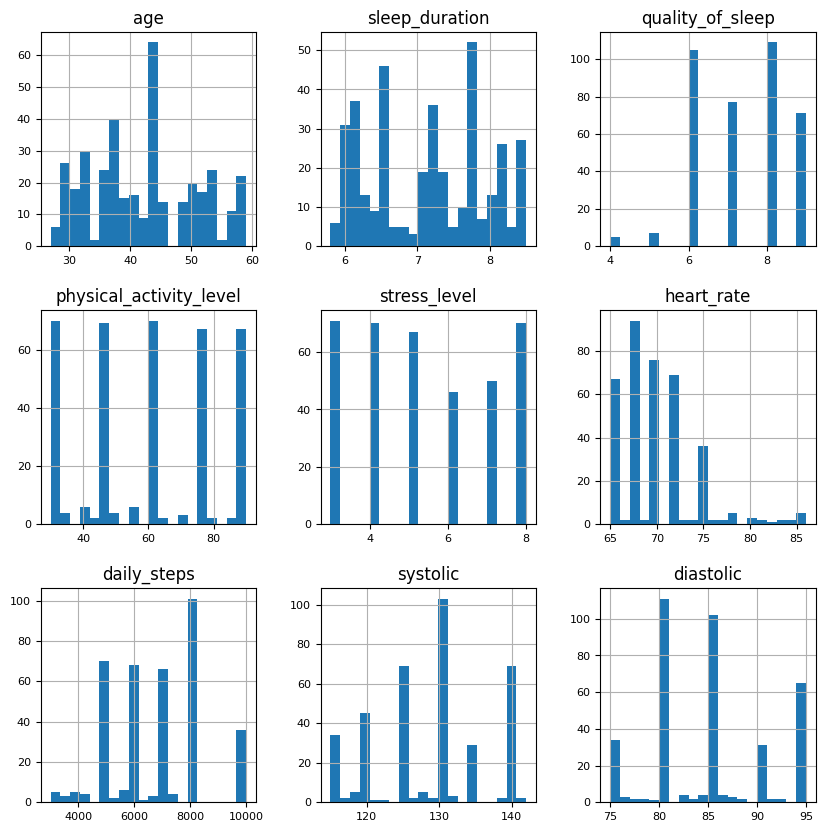

In [18]:
df_num.hist(figsize=(10,10), bins=20, xlabelsize=8, ylabelsize=8)

Lets now try the Feature to Feature relationship

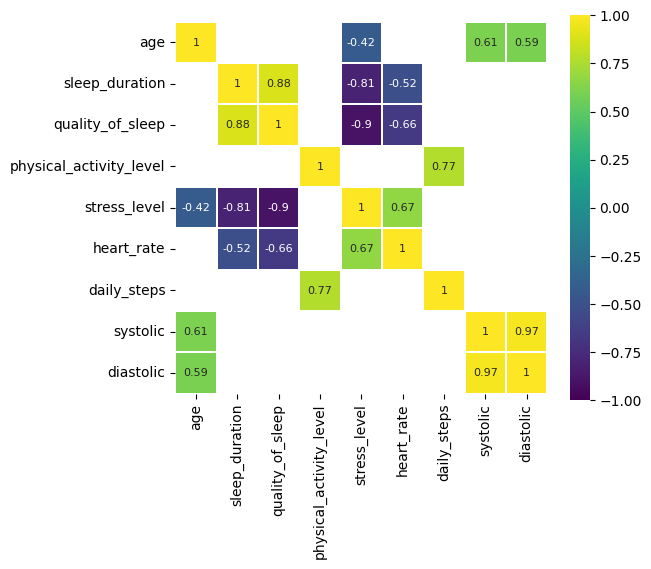

In [20]:
corr = df_num.corr()
plt.figure(figsize=(6,5))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**Observations**
- `sleep_duration` and `quality_of_sleep` are positively correlated which means the longer one sleeps, the better the quality of sleep? We'll need to explore this further..
- `sleep_duration` and `quality_of_sleep` are negatively correlated with `stress_level`, which is expected
- `age` is positively correlated with systolic and diastolic, which means as we age the BP increases?
- `stress_level` and `heart_rate` are positively correlated